In [157]:
import configparser
import tweepy
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from emot.emo_unicode import UNICODE_EMOJI # For emojis
import re
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk.corpus import stopwords       # to get stopwords from NLTK library
from nltk.tokenize import word_tokenize # to create word tokens
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk.corpus import words           # Get all words in english 

import string
import random
from PIL import Image

import textblob
from textblob import TextBlob

# Scraping data from the API

In [189]:
tweepy.Client("")
auth = tweepy.OAuth2AppHandler("", "")
api = tweepy.API(auth)

In [192]:
query = ' (BlackAdam OR blackadam OR BLACK ADAM OR black adam)  -is:retweet -is:reply lang:en'

columns=[ 'author_id','tweet','time_of_tweet' ,"public_metrics",'geo_id']
start_date='2022-10-22 00:00:00+00:00'
end_date='2022-10-22 00:00:00+00:00'

for tweet in tweepy.Paginator(client.search_recent_tweets,query=query,tweet_fields=['author_id','context_annotations', 'created_at',"public_metrics",'geo'], max_results=100).flatten(limit=1000):
    data.append([tweet.author_id, tweet.text, tweet.created_at,tweet.public_metrics,tweet.geo])
df = pd.DataFrame(data, columns=columns)
df.tail()        


,author_id,tweet,time_of_tweet,public_metrics,geo_id
1595,1364980667814006787,"""Look. I'm here to help... but it has to be on...",2022-10-25 06:48:22+00:00,"{'retweet_count': 18, 'reply_count': 0, 'like_...",None
1596,1345030359575113730,"My dad (59) looked at me and asked,“Who is Bla...",2022-10-25 06:48:03+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",None
1597,55840096,Black Adam is a awesome movie. \n\nDoctor fate...,2022-10-25 06:47:57+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",None
1598,624986050,"I didn’t come for story, I came for the #Dolby...",2022-10-25 06:47:53+00:00,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",None
1599,999105496509435905,The sketch from today’s livestream. Not finish...,2022-10-25 06:47:04+00:00,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",None


In [193]:
title = "BlackAdam"
df.to_csv('blackadam1.csv')

## Assessing the data

In [198]:
blackadam_df=pd.read_csv('blackadam1.csv')
#checking for duplicate entries
blackadam_df.duplicated().sum()

0

In [200]:
#checking for null values
blackadam_df.isnull().sum()

Unnamed: 0           0
author_id            0
tweet                0
time_of_tweet        0
public_metrics       0
geo_id            1545
dtype: int64

In [205]:
#checking the data types of the columns
blackadam_df.dtypes

author_id          int64
tweet             object
time_of_tweet     object
public_metrics    object
dtype: object

In [202]:
#dropping unwanted columns
blackadam_df.drop("Unnamed: 0", axis=1, inplace=True)
blackadam_df.drop("geo_id", axis=1, inplace=True)

In [203]:
blackadam_df.reset_index(drop=True)
blackadam_df.head()

,author_id,tweet,time_of_tweet,public_metrics
0,1409374907834699781,#BlackAdam v. #Superman: Dawn of Justice (Agai...,2022-10-23 23:59:59+00:00,"{'retweet_count': 0, 'reply_count': 2, 'like_c..."
1,1238671668945575936,Just saw Black Adam today and the long wait wa...,2022-10-23 23:59:56+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c..."
2,1576943214568914946,Black Adam opens at the top of the weekend box...,2022-10-23 23:59:55+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c..."
3,1001932871559516160,Bitch said what movie she should see I said bl...,2022-10-23 23:59:50+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c..."
4,1445981969318301698,Black Adam was boring,2022-10-23 23:59:49+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c..."


In [206]:
#saving the cleaned dataframe to csv file
blackadam_df.to_csv("clean_blackadam.csv")

# Data Processing

In [207]:
#function to remove hashtag
def Hashtag(tweet):
    tweet = tweet.lower()  #converts tweet to lower case
    tweet = re.findall(r'\#\w+',tweet)  
    return " ".join(tweet)

In [208]:
blackadam_df['hashtags'] = blackadam_df['tweet'].apply(Hashtag)
blackadam_df.sample(5)

,author_id,tweet,time_of_tweet,public_metrics,hashtags
282,283604227,Andy Vermaut shares:Dwayne Johnson celebrates ...,2022-10-25 11:33:36+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",
747,347810392,On this episode of The Hollywood Outsider podc...,2022-10-25 11:44:11+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",#blackadam #theflash
1502,1516621974969417729,Experts say lightning can create heat close to...,2022-10-25 07:16:50+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",#blackadam
1371,1243543566737182729,"Black adam is good, go watch it.",2022-10-25 07:49:36+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",
1267,1285668237364142087,I'm thinking of catching another showing of #B...,2022-10-25 08:32:12+00:00,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",#blackadam


In [210]:
#converting the hashtag column to a list in other to get the value counts
hashtag_list = blackadam_df["hashtags"].to_list()

new_hashtags = []
for hash in hashtag_list:
    new_hash = hash.split()
    for new in new_hash:
        new_hashtags.append(new)
        new_hashtags


In [211]:
counts = Counter(new_hashtags)
hashtag_df = pd.DataFrame.from_dict(counts, orient="index").reset_index()
hashtag_df.columns = ["hashtag", "counts"]
hashtag_df.sort_values("counts", ascending=False, inplace=True)
hashtag_df.head()

,hashtag,counts
0,#blackadam,562
22,#blackadammovie,71
37,#dccomics,65
1,#superman,56
83,#tuesdayvibe,40


In [212]:
hashtag_df.to_csv("blackadam_hashtags.csv")

In [217]:
#defining processed content by removing words that do not contribute to any analysis.
stop_words = list(stopwords.words('english'))
user_stop_words = ["i", "i'm", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", 
                   "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
                   "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
                   "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", 
                   "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "i'll","we'll","they'll",
                   "'s",'anyone','today','yesterday','day','isnt', 'shouldnt', "didn't", 'wasnt', 'werent','mustnt', 
                   "been…",'aht', 've', 'next',"all", "any", "both", "each", 'by',
                   "year"]

words = ["blackadam", "dc comics","dccomics","black adam", "superman", "henry cavil", "henrycavil", "super man", "the rock", "therock",'dwayne johnson','dwaynejohnson']
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets + words
emojis = list(UNICODE_EMOJI.keys())

In [218]:
def processing_tweets(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags = re.MULTILINE)   # Cleaning and removing URL’s
    tweet = re.sub(r'\@\w+|\#\w+|\d+', '',  tweet)                                # Cleaning and removing repeating characters
    tweet_tokens = word_tokenize(tweet)  
    filter_words = [w for w in tweet_tokens if w not in stop_words]
    filter_words = [w for w in filter_words if w not in emojis]
    unpunctuated_words = [w for w in filter_words if w not in string.punctuation] # Cleaning and removing punctuations
    lemmatizer = WordNetLemmatizer() 
    lemmatized_words = [lemmatizer.lemmatize(w) for w in unpunctuated_words]
    return " ".join(lemmatized_words)

In [219]:
# create a new column called 'cleaned tweets' by applying processing tweets function to the tweet column.
blackadam_df['cleaned_tweets'] = blackadam_df['tweet'].apply(processing_tweets)
blackadam_df.head()

,author_id,tweet,time_of_tweet,public_metrics,hashtags,cleaned_tweets
0,1409374907834699781,#BlackAdam v. #Superman: Dawn of Justice (Agai...,2022-10-23 23:59:59+00:00,"{'retweet_count': 0, 'reply_count': 2, 'like_c...",#blackadam #superman #andor #gothamknights #mo...,v. dawn justice curious ep curious existential...
1,1238671668945575936,Just saw Black Adam today and the long wait wa...,2022-10-23 23:59:56+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",#blackadam #dceu #therock,saw black adam long wait worth far one best fi...
2,1576943214568914946,Black Adam opens at the top of the weekend box...,2022-10-23 23:59:55+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",,black adam open top weekend box office
3,1001932871559516160,Bitch said what movie she should see I said bl...,2022-10-23 23:59:50+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",,bitch said movie see said black adam said neve...
4,1445981969318301698,Black Adam was boring,2022-10-23 23:59:49+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",,black adam boring


In [220]:
#Extract all cleanned tweets into one list string with each word separate with a "space"

tweets_list_string = blackadam_df["cleaned_tweets"].tolist()
tweets_list_string = " ".join(tweets_list_string)
blackadam_df.sample(5)

,author_id,tweet,time_of_tweet,public_metrics,hashtags,cleaned_tweets
486,17878196,ESPN and Warner Bros. Celebrate MNF With Black...,2022-10-25 10:25:24+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",,espn warner bros. celebrate mnf black adam film
1200,544114312,Didn't know Harris Rauf is a Black Adam fan ht...,2022-10-25 08:56:58+00:00,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",,n't know harris rauf black adam fan
366,2445588373,Today's NEW #Shorts Green Lantern Acts Childis...,2022-10-25 11:07:03+00:00,"{'retweet_count': 3, 'reply_count': 0, 'like_c...",#shorts #youtubeshorts #blackadam #youtubegami...,new green lantern act childish
1525,218812313,16 years +: DC Comic – Gotham Knights Review!!...,2022-10-25 07:08:55+00:00,"{'retweet_count': 4, 'reply_count': 0, 'like_c...",#gothamknights #dccomics #blackadam #playstati...,year dc comic – gotham knight review
996,1540326366498811905,Black Adam and arcade mode are headed to Multi...,2022-10-25 10:23:17+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",,black adam arcade mode headed multiversus week


# Sentiment Analysis

In [221]:
def get_tweet_polarity(tweet):
        """
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        """
        return TextBlob(tweet).sentiment.polarity
def get_sentiment_textblob(text):
        if text > 0:                
            return "positive"
        elif text == 0:
            return "neutral"
        else:
            return "negative"

In [222]:
# create a new column called 'polarity' & 'sentiment' by applying 'get tweet polarity' & 'get sentiment textblob' 
#function to the 'cleaned tweet' & 'polarity' column.

blackadam_df['polarity']=blackadam_df['cleaned_tweets'].apply(get_tweet_polarity)
blackadam_df['sentiment']=blackadam_df['polarity'].apply(get_sentiment_textblob)
blackadam_df['sentiment'].sample(5)

548     positive
1030    negative
464     negative
1376    positive
1421    positive
Name: sentiment, dtype: object

In [223]:
blackadam_df['polarity'].sample(5)

1414    0.000000
819    -0.125000
304     0.091667
571     0.083333
1566    0.266667
Name: polarity, dtype: float64

In [224]:
#create a function to calculate the total and percentage of sentiments

def sentiment_count(data, count):
    total = data.loc[:,count].value_counts(dropna=False)
    percentage = round(data.loc[:,count].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total, percentage],axis=1,keys=["total", "Percentage"])

In [225]:
#save sentiment count to csv for visualization

sentiment_count(blackadam_df, "sentiment").to_csv("sentiment_count.csv")

In [234]:
# get unique values and count in sentiment column

sentiment_df = blackadam_df['sentiment'].value_counts()


# Visualization

In [258]:
#define a function to design the backgorund of word cloud object

def word_color_func(word, font_size, position, orientation="horizontal", random_state=None,**kwargs):
    return "hsl(34, 99%%, %d%%)" % random.randint(50, 80)

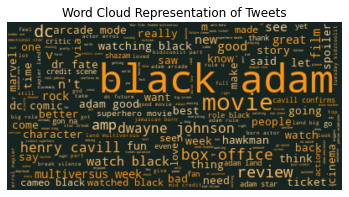

In [283]:
twitter_wc = WordCloud(background_color='#172522')

# generate the word cloud
twitter_wc.generate(tweets_list_string)

# display the word cloud
plt.figure()


plt.imshow(twitter_wc.recolor(color_func = word_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Representation of Tweets");
plt.show()

# store to file
#plt.savefig("blackadamedit.png", format="png")
#plt.show()

Text(0.5, 1.0, 'Twitter Users Sentiments on Black Adam movie')

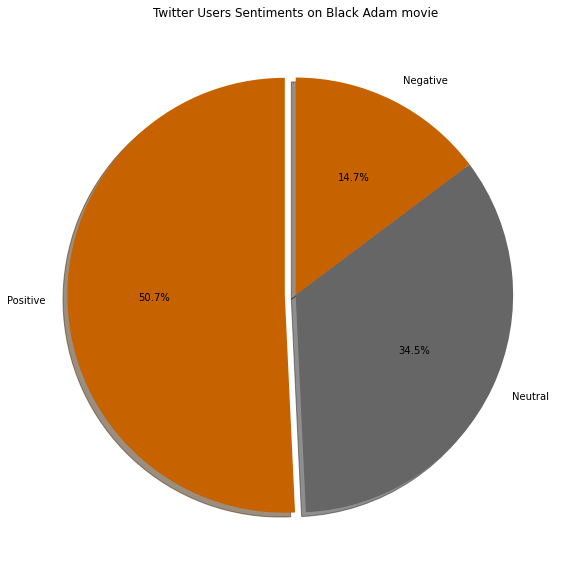

In [275]:
#Plotting a pie chart to show distribution of Sentiments

labels = "Positive", "Neutral", "Negative"
explode = (0.05, 0, 0)                                              # only "explode" the first slice (i.e. 'positive')
plt.figure(figsize=[15,10], facecolor='none')
plt.pie(sentiment_df, labels=labels, colors=['#c66300', '#666666'], 
        startangle=90, shadow=True, explode=explode, autopct='%1.1f%%');
plt.title('Twitter Users Sentiments on Black Adam movie')

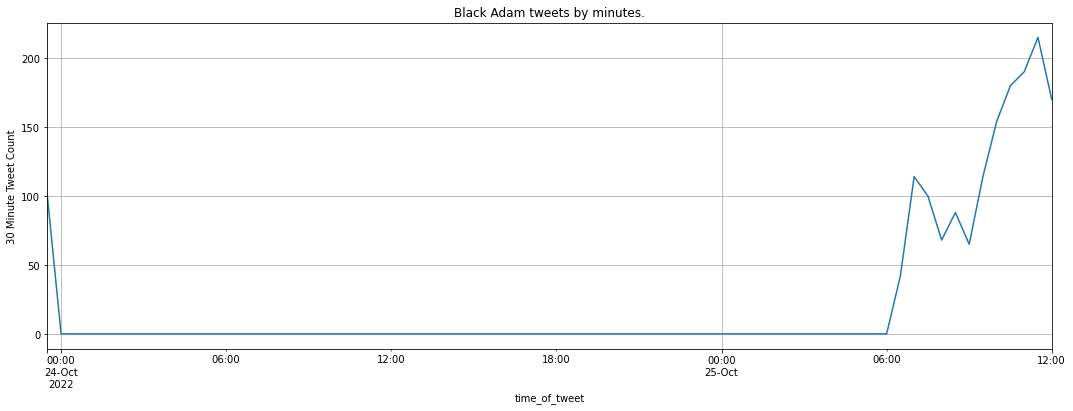

In [254]:
blackadam_df['time_of_tweet'] = pd.to_datetime(blackadam_df['time_of_tweet'])


tweet_time_df = blackadam_df.groupby(pd.Grouper(key='time_of_tweet', freq='30Min', convention='start')).size()
tweet_time_df.plot(figsize=(18,6))
plt.ylabel("30 Minute Tweet Count")
plt.title("Black Adam tweets by minutes.")
plt.grid(True)

More data is needed 